## Step-01: Load the Dataset

In [1]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

## Step-02: Data Preprocessing

In [2]:
# Converting TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Creating a customer profile
customer_profile = transactions.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Number of transactions
    'TotalValue': 'sum',       # Total spend
    'Quantity': 'sum'          # Total quantity purchased
}).reset_index()

# Merging with customer information
customer_profile = customer_profile.merge(customers, on='CustomerID')

# Selecting relevant features for clustering
features = customer_profile[['TransactionID', 'TotalValue', 'Quantity']]

## Step-03: Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Steo-04: Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Initializing variables to store results
db_index_results = []
cluster_range = range(2, 11)  # From 2 to 10 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    
    # Calculating the Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, labels)
    db_index_results.append((n_clusters, db_index))

# Finding the best DB Index
best_db_index = min(db_index_results, key=lambda x: x[1])
print(f'Optimal number of clusters: {best_db_index[0]}, DB Index: {best_db_index[1]}')

Optimal number of clusters: 2, DB Index: 0.7233652695141874


## Step-05: Visualizing Clusters

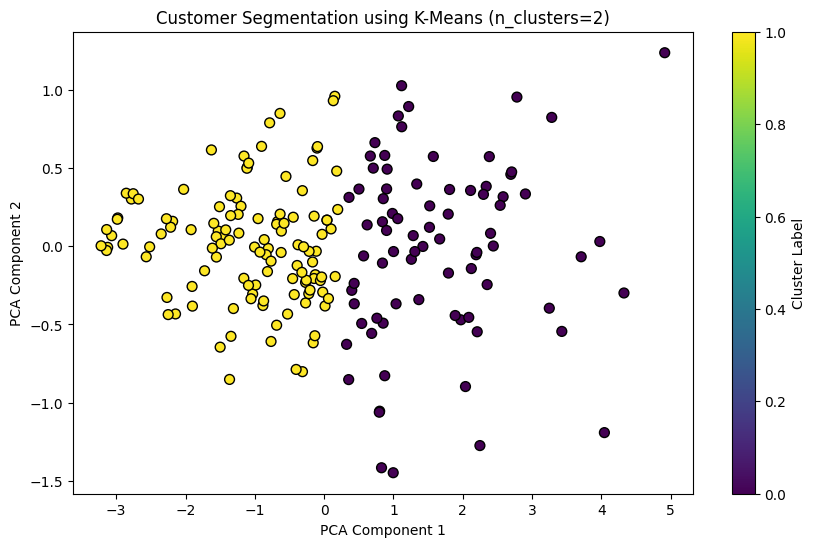

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fitting KMeans with the optimal number of clusters
optimal_n_clusters = best_db_index[0]
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Reducing dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Customer Segmentation using K-Means (n_clusters={optimal_n_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Results

In [6]:
from sklearn.metrics import silhouette_score

# Calculating silhouette score
silhouette_avg = silhouette_score(scaled_features, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.49487297008885417
